In [ ]:
#Making a dataframe out of the csv that is really problematic

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

A = np.arange(250,720,10)
l = np.char.mod('%d', A)
headerList = np.concatenate((["nm"], l))

df = pd.read_csv ('Administrator 855.CSV', header= None, names=headerList)
df = df.set_index('nm')
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df

,250,260,270,280,290,300,310,320,330,340,...,610,620,630,640,650,660,670,680,690,700
nm,,,,,,,,,,,,,,,,,,,,,
500,0;-20,93;131,39;1,97;34,41;-8,69;11,55;79,87;66,34;101,97;80,...,14;94,17;65,98;39,99;42,26;61,46;47,41;97,31;97,00;57,99;98
500,1;-21,01;131,45;1,75;34,38;-8,73;11,51;79,67;66,18;101,86;80,...,13;94,15;65,96;39,98;42,26;61,47;47,42;97,32;97,02;57,99;98
500,2;-20,78;131,53;1,72;34,48;-8,66;11,61;79,83;66,39;102,02;80,...,14;94,16;65,97;39,99;42,27;61,48;47,44;97,33;97,02;58,01;98
500,3;-20,25;131,63;1,89;34,70;-8,45;11,86;80,37;66,96;102,44;80,...,18;94,21;66,01;40,02;42,30;61,50;47,44;97,34;97,02;58,05;98
500,4;-19,44;131,75;2,24;35,03;-8,14;12,25;81,25;67,88;103,12;81,...,24;94,29;66,08;40,07;42,34;61,52;47,45;97,35;97,01;58,10;98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,6;1702,80;1343,61;471,33;666,30;276,84;227,51;429,51;513,79;393,57;289,...,85;334,09;576,46;780,35;862,80;711,55;142,69;305,74;47,38;25,08;48
799,7;1501,84;1210,17;415,47;595,75;241,15;202,65;387,34;462,19;360,17;263,...,75;306,28;516,56;694,48;767,89;635,96;132,12;281,50;53,13;28,87;54
799,8;1294,03;1069,95;358,12;521,97;204,93;176,92;344,31;408,88;325,62;237,...,06;277,48;454,68;605,49;669,47;557,68;121,02;256,39;59,07;32,81;60


In [ ]:
df_aux = pd.DataFrame()
for i in range(250,710,10):
  x = str(i)
  df_aux[['0',x]] = df[x].str.split(";",expand=True)
  df_aux.drop('0', inplace=True, axis=1)
df_aux

,250,260,270,280,290,300,310,320,330,340,...,610,620,630,640,650,660,670,680,690,700
nm,,,,,,,,,,,,,,,,,,,,,
500,-20,131,1,34,-8,11,79,66,101,80,...,94,65,39,42,61,47,97,97,57,98
500,-21,131,1,34,-8,11,79,66,101,80,...,94,65,39,42,61,47,97,97,57,98
500,-20,131,1,34,-8,11,79,66,102,80,...,94,65,39,42,61,47,97,97,58,98
500,-20,131,1,34,-8,11,80,66,102,80,...,94,66,40,42,61,47,97,97,58,98
500,-19,131,2,35,-8,12,81,67,103,81,...,94,66,40,42,61,47,97,97,58,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,1702,1343,471,666,276,227,429,513,393,289,...,334,576,780,862,711,142,305,47,25,48
799,1501,1210,415,595,241,202,387,462,360,263,...,306,516,694,767,635,132,281,53,28,54
799,1294,1069,358,521,204,176,344,408,325,237,...,277,454,605,669,557,121,256,59,32,60


In [ ]:
df_aux2 = df_aux.astype(float)

In [ ]:
df_aux2[df_aux2 < 0] = 0

In [ ]:
df_aux2[df_aux2 > 100000] = 100000

In [ ]:
df_aux3 = df_aux2.transpose()

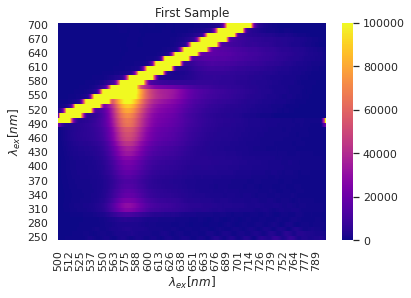

In [ ]:
import seaborn as sns
sns.set()
#plt.figure(figsize=(10, 5))

ax = sns.heatmap(df_aux3, cmap="plasma")
ax.invert_yaxis()
plt.title('First Sample') # title with fontsize 20
plt.xlabel('$\lambda_{ex} [nm]$') # x-axis label with fontsize 15
plt.ylabel('$\lambda_{ex} [nm]$')
plt.show()

In [ ]:
df_aux2.T.to_numpy()

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.294e+03, 1.105e+03,
        9.210e+02],
       [1.310e+02, 1.310e+02, 1.310e+02, ..., 1.069e+03, 9.410e+02,
        8.130e+02],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 3.580e+02, 3.060e+02,
        2.560e+02],
       ...,
       [9.700e+01, 9.700e+01, 9.700e+01, ..., 5.900e+01, 6.400e+01,
        6.900e+01],
       [5.700e+01, 5.700e+01, 5.800e+01, ..., 3.200e+01, 3.600e+01,
        3.900e+01],
       [9.800e+01, 9.800e+01, 9.800e+01, ..., 6.000e+01, 6.500e+01,
        7.100e+01]])

In [ ]:
df_aux_extra = df_aux2[~df_aux2.index.duplicated(keep='first')]

In [ ]:
matrix = df_aux_extra.to_numpy()

In [ ]:
A = matrix.sum(axis=1)

In [ ]:
A

array([ 130868.,  139865.,  184429.,  230367.,  232219.,  234979.,
        241577.,  253108.,  269913.,  292053.,  319039.,  329092.,
        332253.,  336055.,  340493.,  325174.,  313577.,  311037.,
        317578.,  333204.,  355969.,  357571.,  356804.,  356996.,
        358185.,  361346.,  367783.,  357378.,  351631.,  351502.,
        356770.,  367339.,  378009.,  375512.,  376469.,  381341.,
        390040.,  402551.,  412251.,  406723.,  407693.,  416340.,
        415487.,  414744.,  419838.,  429808.,  444220.,  463064.,
        475103.,  479395.,  492000.,  511510.,  518841.,  533153.,
        554010.,  580245.,  611344.,  647940.,  689713.,  717987.,
        755018.,  789656.,  821507.,  860435.,  903879.,  950542.,
       1000397., 1053461., 1108594., 1165110., 1222045., 1276189.,
       1310638., 1342665., 1371857., 1398797., 1423086., 1443972.,
       1463630., 1482614., 1500633., 1512349., 1502134., 1489083.,
       1474643., 1458828., 1441632., 1423913., 1408307., 13886

In [ ]:
X = np.linspace(500,800,301)

Text(0.5, 1.0, 'Intensity profile of the first sample')

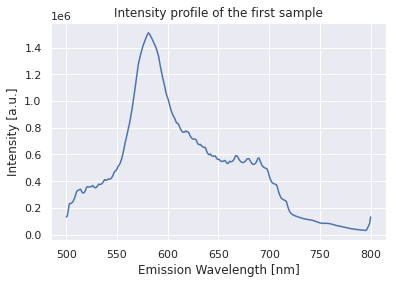

In [ ]:
plt.plot(X,A)
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Intensity profile of the first sample')

In [ ]:
df = pd.read_csv('lights.csv', names=['WL','Day','BB'], header=None)
df2 = df.astype(float)

In [ ]:
Day = df2['Day'].to_numpy()
BB = df2['BB'].to_numpy()

Text(0.5, 1.0, 'IP under CIE standard iluminant D65')

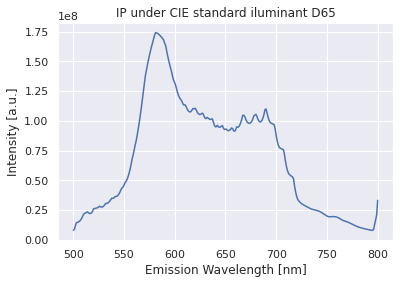

In [ ]:
plt.plot(X,np.multiply(A,Day))
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('IP under CIE standard iluminant D65')

Text(0.5, 1.0, 'IP under CIE standard iluminant A')

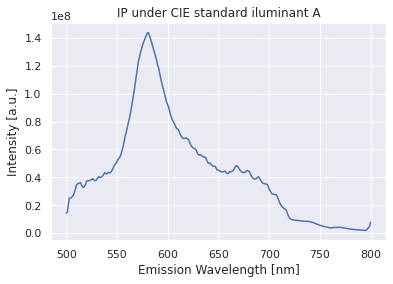

In [ ]:
plt.plot(X,np.multiply(A,BB))
plt.xlabel('Emission Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('IP under CIE standard iluminant A')